#### Random forest model

x = tweets

y = stock labels
  

In [21]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_auc_score,f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('../Data/Combined_Delayed_2Days.csv')
df.head()

,Date,Tweets_clean_more,polarity,subjectivity,sentiment,Label_delayed_2Days
0,2013-01-10,to super clear i dont wish could i mandat anyt...,0.216667,0.525000,positive,Decrease
1,2019-01-10,ye get regulatori pushback may avail region go...,0.123333,0.490556,positive,Increase
2,2020-01-10,dome barrel weld made bar pretti good bar need...,0.411111,0.570988,positive,Decrease
3,2012-01-11,the exec conf room tesla use call denali i dec...,0.600000,1.000000,positive,Decrease
4,2016-01-11,sad hear david bowi die he amaz,-0.500000,1.000000,negative,Increase


In [10]:

x = df['Tweets_clean_more']
y = df['Label_delayed_2Days']

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=123)
vec = CountVectorizer()
vec.fit(x_train)
vec.fit(x_test)
x_train_features = vec.transform(x_train)
x_test_features = vec.transform(x_test)

x_train_features.shape
#x_test_features.shape


(1136, 3361)

## Hyperparameter tuning
https://www.kaggle.com/code/arjunprasadsarkhel/simple-random-forest-with-hyperparameter-tuning/notebook

In [25]:
n_estimators = [5,20,50,100,150,200] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}


In [26]:
clf = RandomForestClassifier()
rf = RandomizedSearchCV(estimator=clf,param_distributions=random_grid,n_iter = 100, cv=5, verbose=2,random_state=35,n_jobs=-1)

In [27]:
rf.fit(x_train_features,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total tim

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100, 150,
                                                         200]},
                   random_state=35, verbose=2)

## Find the best model

In [30]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100, 150, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': True}  



## Model Evaluation

Classification Report:
               precision    recall  f1-score   support

    Decrease       0.53      0.55      0.54       140
    Increase       0.53      0.53      0.53       139
   No Change       0.00      0.00      0.00         5

    accuracy                           0.53       284
   macro avg       0.35      0.36      0.36       284
weighted avg       0.52      0.53      0.52       284

Accuracy Score:  0.528169014084507
F1 Score: 0.528169014084507
ROC AUC score: 0.5246308700166303


/Users/taoyu/opt/anaconda3/envs/anly-580/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/taoyu/opt/anaconda3/envs/anly-580/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/taoyu/opt/anaconda3/envs/anly-580/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

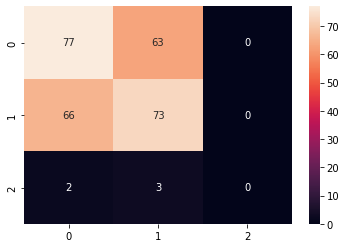

In [35]:
rfclf = RandomForestClassifier(n_estimators=50,min_samples_split=2,min_samples_leaf=3,max_features='sqrt',max_depth=70,bootstrap=True)
rfclf.fit(x_train_features,y_train)
ypred_train = rfclf.predict(x_train_features)
ypred_test = rfclf.predict(x_test_features)
print("Classification Report:\n",classification_report(y_test,ypred_test))
print("Accuracy Score: ",accuracy_score(y_test,ypred_test))
print("F1 Score:",f1_score(y_test,ypred_test,average="micro"))

lb = LabelBinarizer()
lb.fit(y_test)
y_test_lb = lb.transform(y_test)
ypred_test_lb = lb.transform(ypred_test)
print("ROC AUC score:", roc_auc_score(y_test_lb,ypred_test_lb))
cm = confusion_matrix(y_test,ypred_test)

sns.heatmap(cm,annot=True)
plt.show()